In [13]:
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, log_loss

songs_data = pd.read_csv('songs.csv')

In [14]:
songs_data

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3
...,...,...,...,...,...,...,...,...,...,...
355,just-like-that,2006,abba,Pop,Until that day\nMy life had been a river\nFoll...,972,2,0,0,1
356,ring-ring,1995,abba,Pop,I was sitting by the phone\nI was waiting all ...,1283,33,0,0,3
357,reina-danzante,1981,abba,Pop,You can dance\nYou can jive\nHaving the time o...,810,1,0,0,0
358,code-of-the-streets,2006,gangstarr,Hip-Hop,Take this for example young brothers want rep\...,1996,34,0,0,5


In [15]:
X=songs_data.drop(['lyrics','song'],axis=1)
y=songs_data.artist

In [16]:
X=pd.get_dummies(X)
X

,year,length,commas,exclamations,colons,hyphens,artist_abba,artist_blind-guardian,artist_gangstarr,genre_Hip-Hop,genre_Metal,genre_Pop
0,2007,1300,24,5,0,11,False,False,True,True,False,False
1,2006,1566,0,0,0,0,False,True,False,False,True,False
2,2006,996,1,0,1,0,False,True,False,False,True,False
3,2015,2868,5,0,0,0,False,True,False,False,True,False
4,2014,3351,22,0,0,3,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
355,2006,972,2,0,0,1,True,False,False,False,False,True
356,1995,1283,33,0,0,3,True,False,False,False,False,True
357,1981,810,1,0,0,0,True,False,False,False,False,True
358,2006,1996,34,0,0,5,False,False,True,True,False,False


In [17]:
clf=tree.DecisionTreeClassifier(criterion='gini')

In [18]:
clf.fit(X,y)

DecisionTreeClassifier()

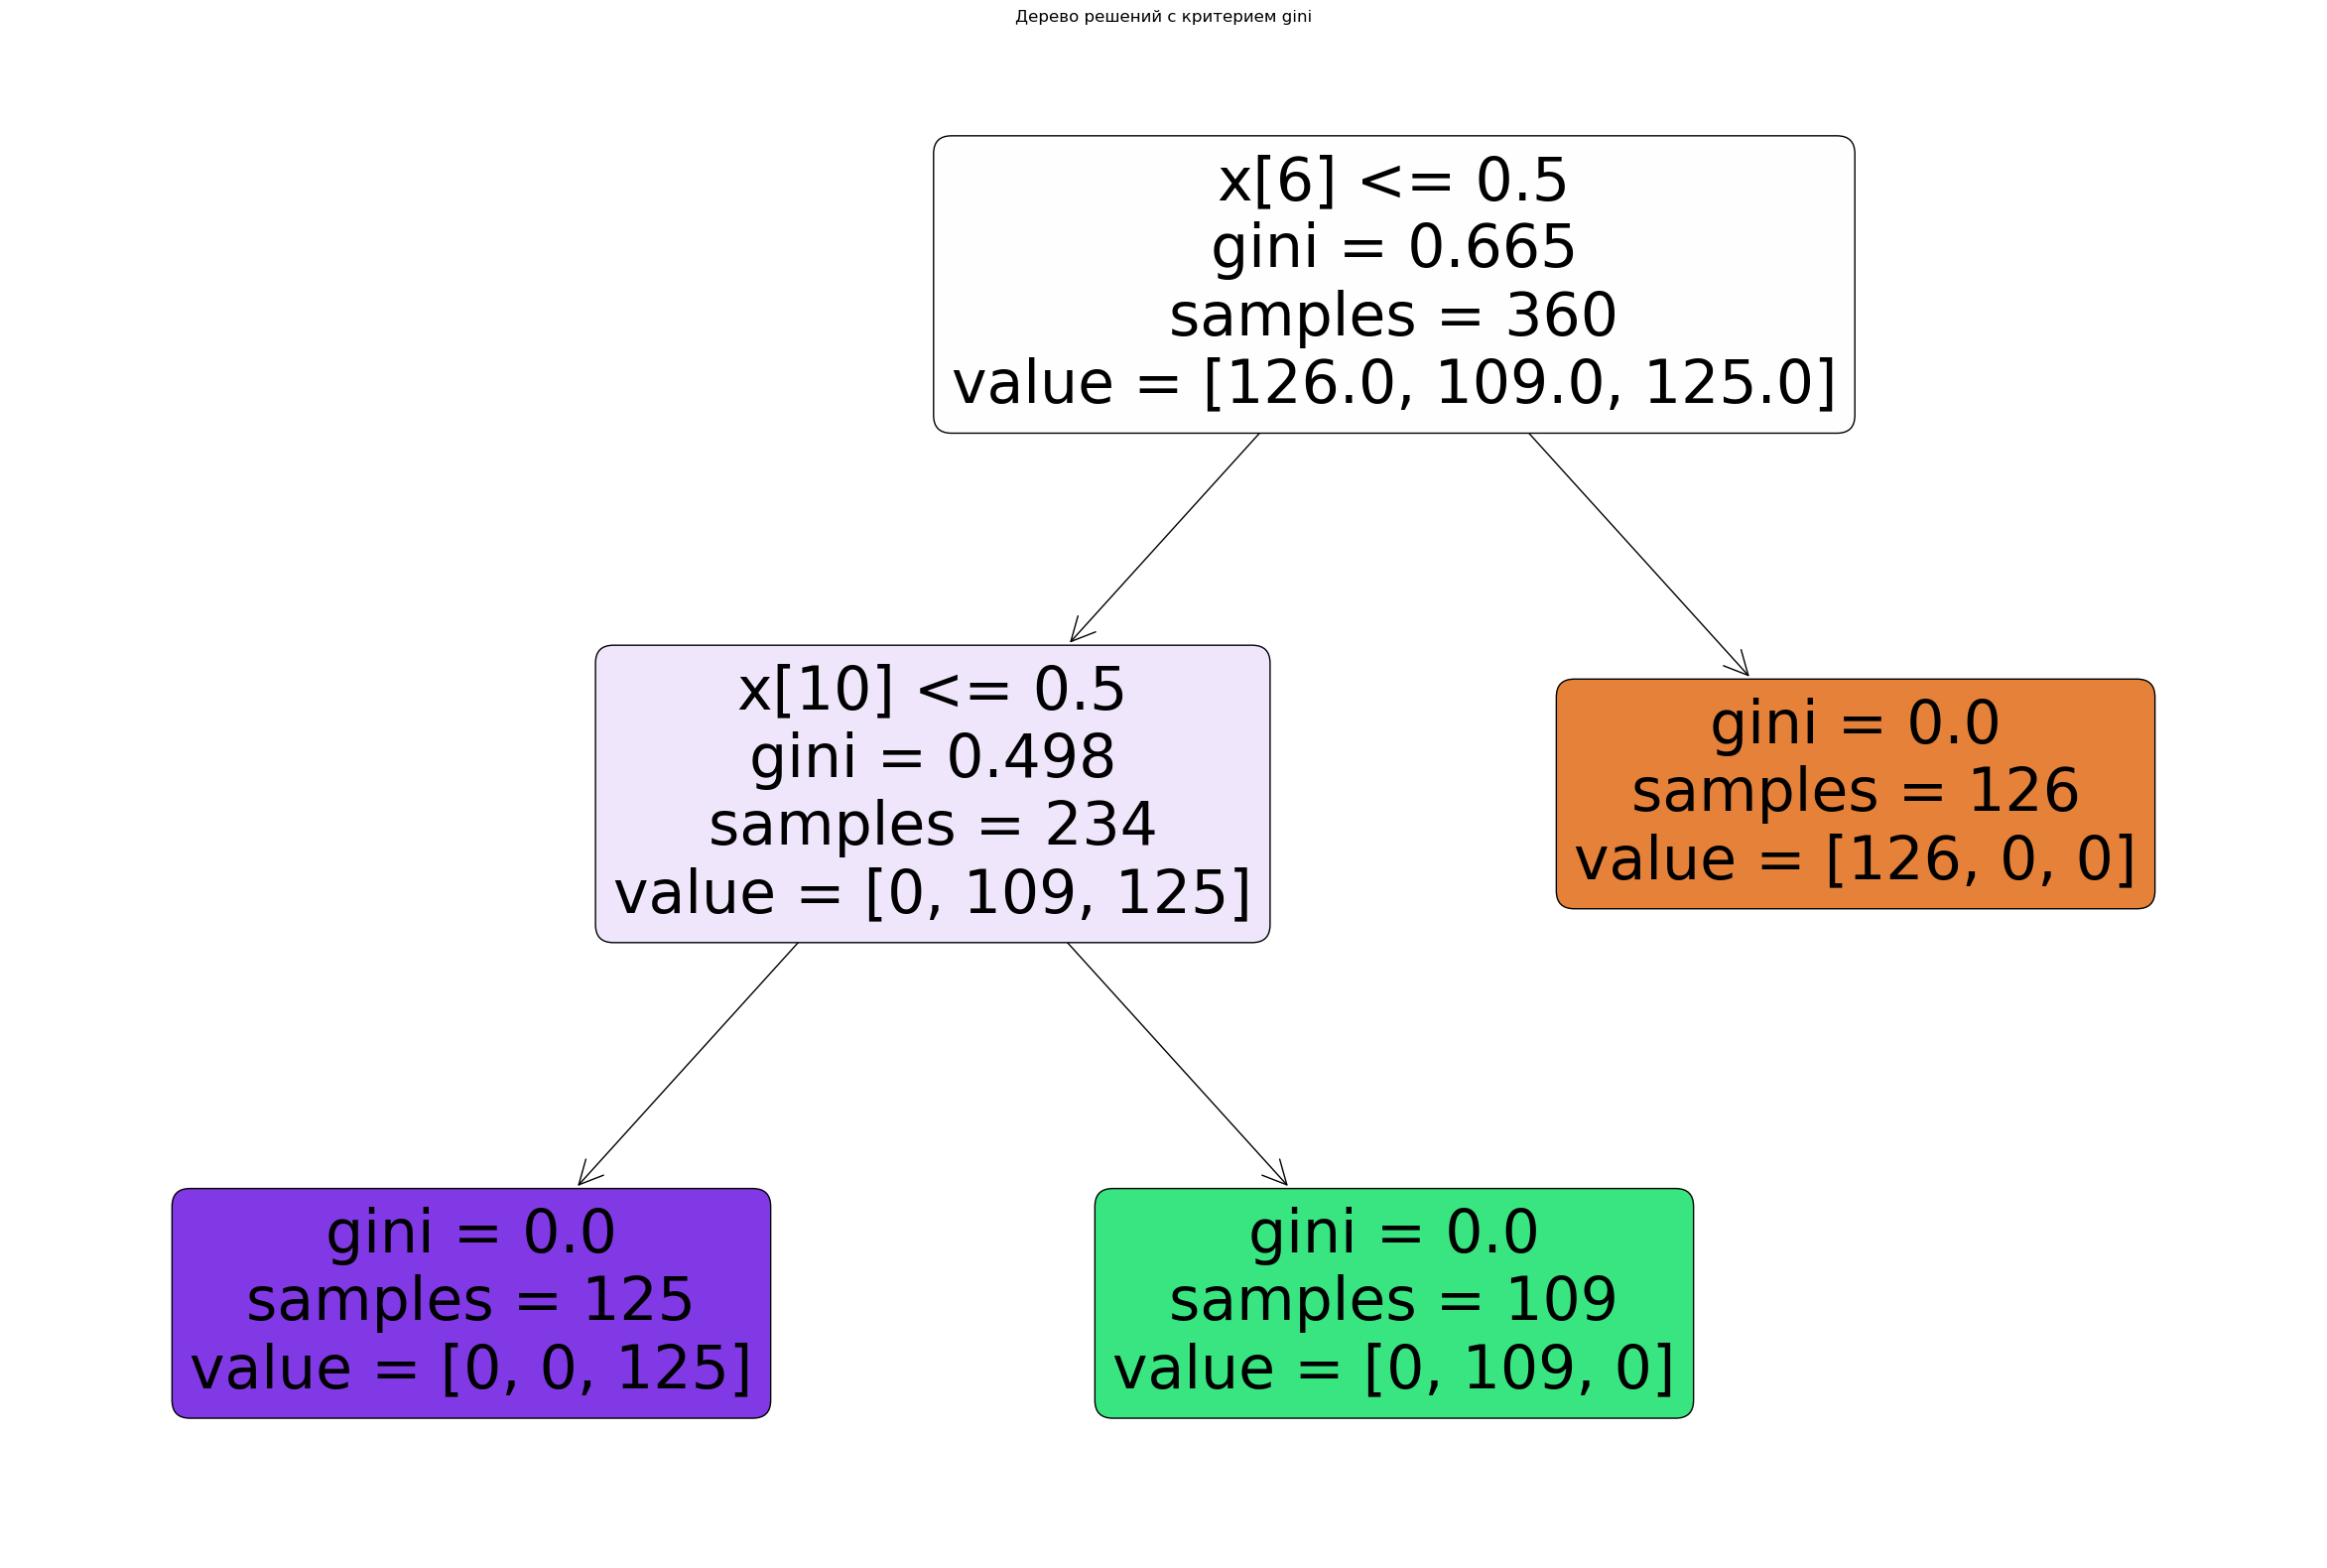

In [19]:
plt.figure(figsize=(30, 20))             #Отрисовка Дерева
tree.plot_tree(clf, filled=True, rounded=True)
plt.title('Дерево решений с критерием gini')
plt.show()

In [ ]:
X_test, X_train, y_test, y_train = train_test_split(X,y, test_size=0.33, random_state=42 )

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
predictions = clf.predict(X_test)
predictions

In [ ]:
precision = precision_score(y_test, predictions, average='micro')
precision

In [ ]:
recall=recall_score(y_test, predictions,  average='micro')
recall